### 直方图

价格直方图

获取一个dataframe,并用直方图显示:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')

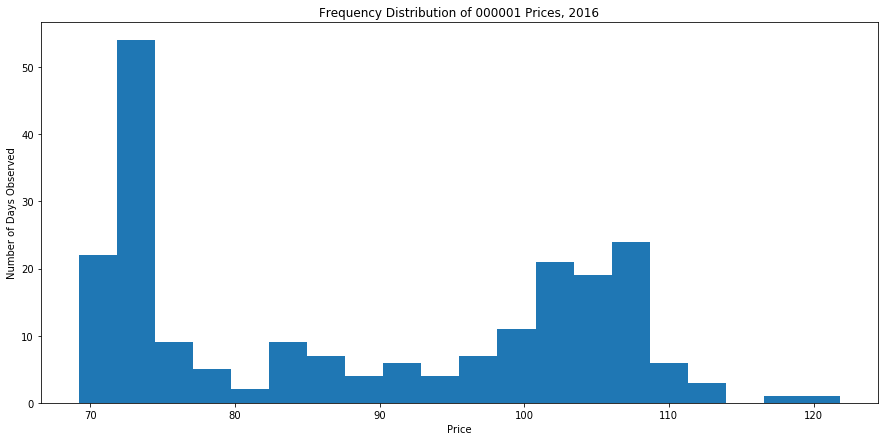

In [3]:
plt.figure(figsize=(15, 7))
plt.hist(stock1.close, bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of 000001 Prices, 2016')
plt.show()

### 回报率直方图：

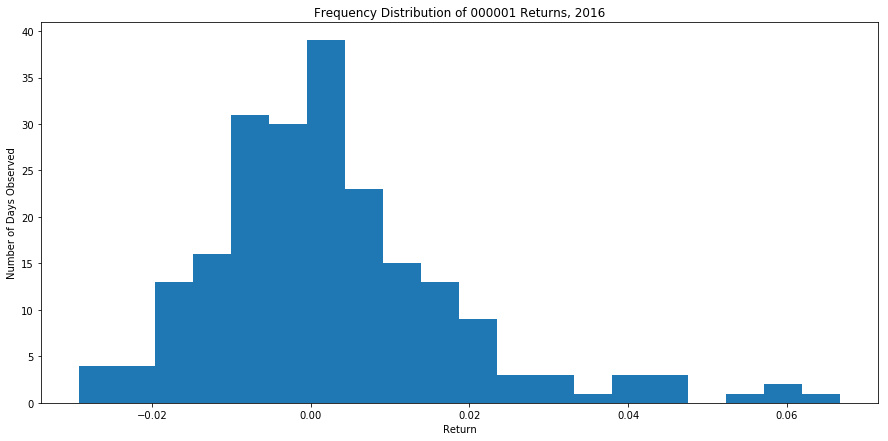

In [4]:
R1 = stock1.close.pct_change()[1:]
# 20 bins，代表柱的数量
plt.figure(figsize=(15, 7))
plt.hist(R1, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of 000001 Returns, 2016')
plt.show()

### 累积直方图 (离散估计的CDF)

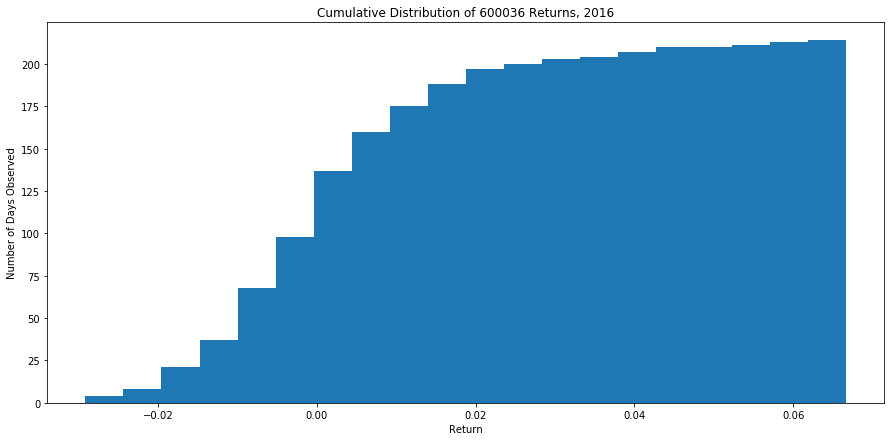

In [5]:
plt.figure(figsize=(15, 7))
plt.hist(R1, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of 600036 Returns, 2016')
plt.show()

In [6]:
stock2 = pd.read_excel('sz50.xlsx',sheetname='601318.XSHG', index_col='datetime')

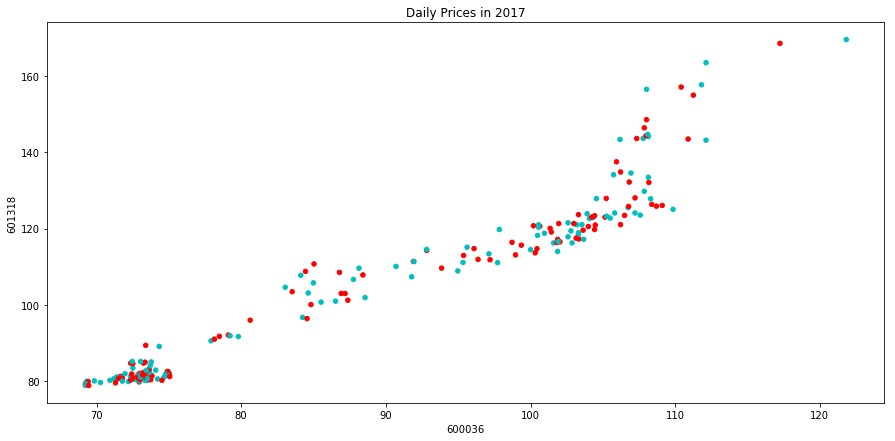

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(stock1.close, stock2.close, c = ['c','r'], s = 20)
plt.xlabel('600036')
plt.ylabel('601318')
plt.title('Daily Prices in 2017')
plt.show()

### 回报率散点图：

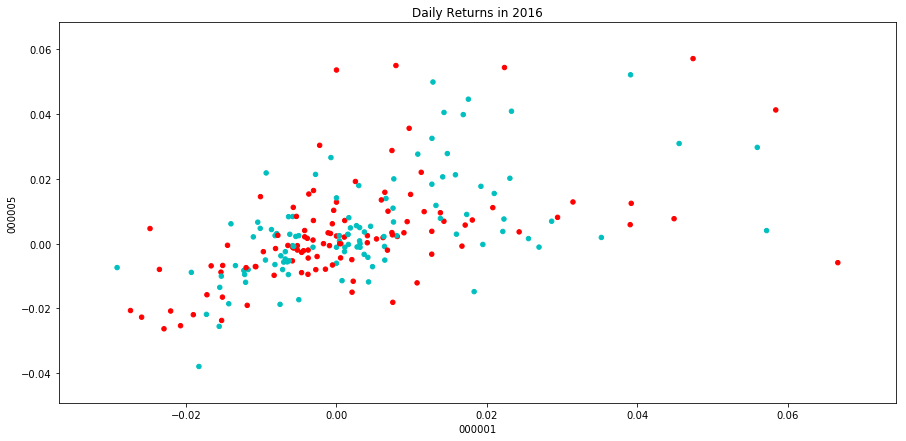

In [8]:
plt.figure(figsize=(15, 7))
R2 = stock2.close.pct_change()[1:]
plt.scatter(R1, R2,c=['c','r'],s=20)
plt.xlabel('000001')
plt.ylabel('000005')
plt.title('Daily Returns in 2016')
plt.show()

## 线图
画出价格线图。

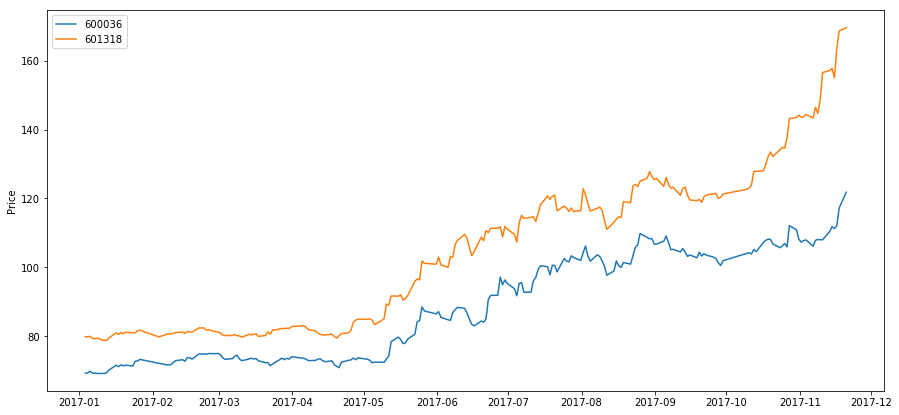

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(stock1.close)
plt.plot(stock2.close)
plt.ylabel('Price')
plt.legend(['600036','601318'])
plt.show()

### 回报率线图
画出股票000001的回报率线图。

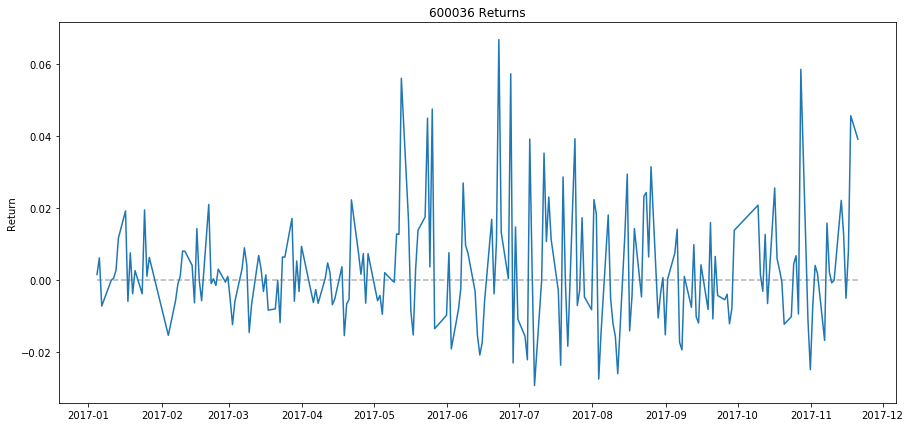

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(R1)
plt.hlines(0,R1.index[0],R1.index[-1],linestyles='dashed',alpha=0.3)
plt.ylabel('Return')
plt.title('600036 Returns')
plt.show()

## 两图合并

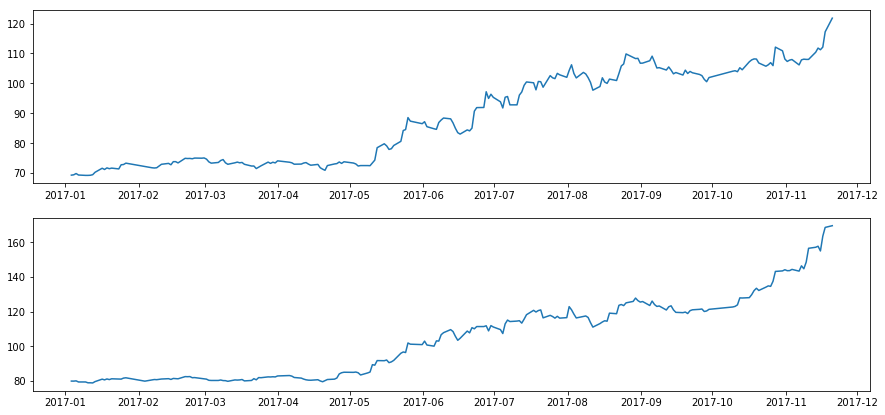

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.plot(stock1.close)
plt.subplot(2,1,2)
plt.plot(stock2.close)
plt.show()

In [12]:
from matplotlib.pylab import date2num

stock1['time'] = list(map(date2num, stock1.index))

In [13]:
candle = stock1.reindex_axis(["time", "open", "high", "low", "close"], 1).values

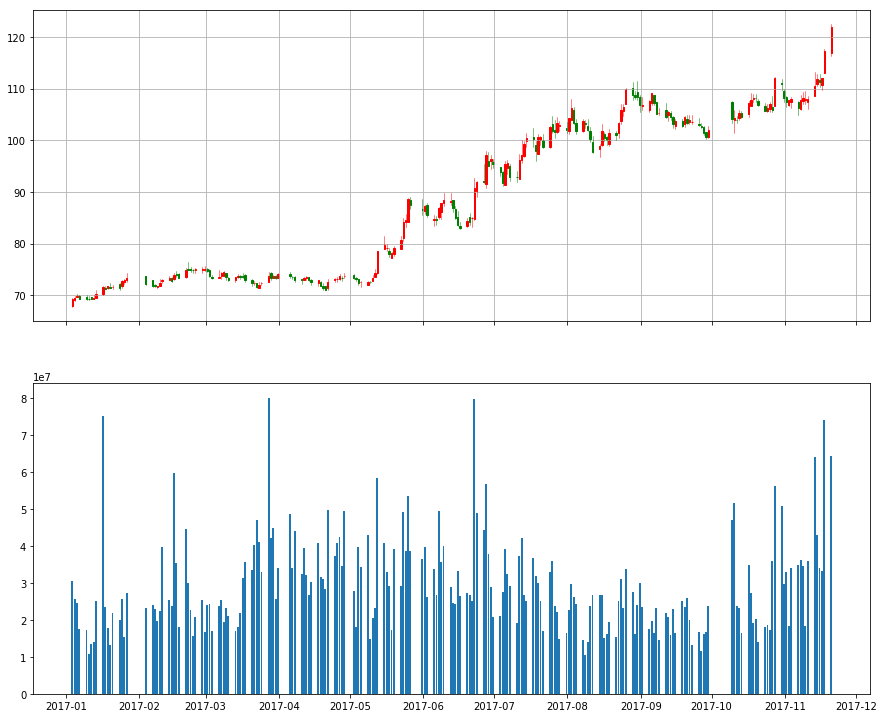

In [15]:
import matplotlib.finance as mpf

fig, (ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,25))
fig.subplots_adjust(bottom=0.5)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax1.bar(stock1.index,stock1.volume)
ax.xaxis_date ()
plt.show()